                                                         E-Commerce Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA

In [5]:
df=pd.read_csv('ecommerce_cleaned.csv')
df

,CustomerID,CustomerName,Gender,Age,Country,OrderID,OrderDate,ProductCategory,ProductName,Price,...,DiscountRate,HasDiscountApplied,TotalAmount,PaymentMethod,DeviceType,ReferralSource,SessionDuration,CustomerTenureDays,ReviewScore,ReviewText
0,C132389,Anil Singh,Female,18,Usa,O278302,2024-02-27,Clothing,Zara Casual Shirt,2196.74,...,0.0,False,2196.74,Netbanking,Mobile,Organic,970.0,423.0,5.0,Nan
1,C133143,Karan Nair,Male,40,Usa,O266464,2024-12-25,Clothing,Zara Casual Shirt,1843.29,...,0.0,False,1843.29,Netbanking,Mobile,Search,240.0,917.0,3.0,Okay Product
2,C105591,Aisha Varma,Female,40,Germany,O293227,2024-04-23,Electronics,Apple Ipad 10Th,26148.78,...,0.0,False,26148.78,Upi,Mobile,Email,233.0,560.0,5.0,Very Satisfied
3,C106172,Hemender Mehta,Male,18,Uk,O201747,2024-02-20,Electronics,Apple Ipad 10Th,29340.19,...,0.0,False,29340.19,Upi,Mobile,Ad,163.0,91.0,4.0,Nan
4,C134744,Vikram Mehta,Female,36,Uk,O280004,2024-02-25,Electronics,Apple Ipad 10Th,24367.64,...,0.0,False,24367.64,Upi,Mobile,Friend,149.0,11.0,4.0,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,C140533,Fatima Nair,Male,18,Uk,O206265,2024-06-18,Electronics,Apple Ipad 10Th,29838.26,...,5.0,True,28346.35,Upi,Mobile,Organic,185.0,621.0,5.0,Great Product
99996,C138850,Aisha Das,Female,44,Canada,O254886,2024-02-16,Clothing,Zara Casual Shirt,1828.11,...,0.0,False,1828.11,Upi,Mobile,Social,204.0,8.0,3.0,Nan
99997,C110615,Aisha Joseph,Male,47,India,O276820,2024-12-25,Furniture,Office Ergonomic Chair,9024.69,...,5.0,True,8573.46,Upi,Mobile,Friend,185.0,92.0,4.0,Nan
99998,C125593,Vikram Reddy,Female,37,Usa,O200860,2024-12-24,Clothing,Nike Running Shoes,3915.72,...,0.0,False,15662.88,Upi,Desktop,Social,170.0,207.0,3.0,Nothing Special


In [8]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  object        
 1   CustomerName        100000 non-null  object        
 2   Gender              100000 non-null  object        
 3   Age                 100000 non-null  int64         
 4   Country             100000 non-null  object        
 5   OrderID             100000 non-null  object        
 6   OrderDate           99800 non-null   datetime64[ns]
 7   ProductCategory     100000 non-null  object        
 8   ProductName         100000 non-null  object        
 9   Price               100000 non-null  float64       
 10  Quantity            100000 non-null  int64         
 11  DiscountRate        100000 non-null  float64       
 12  HasDiscountApplied  100000 non-null  bool          
 13  TotalAmount         100000 non

In [10]:

monthly_sales = (
    df.groupby(pd.Grouper(key='OrderDate', freq='M'))['TotalAmount']
      .sum()
      .reset_index()
)
monthly_sales.columns = ['Month', 'TotalSales']
monthly_sales.head()


C:\Users\hemen\AppData\Local\Temp\ipykernel_23336\4021358902.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='OrderDate', freq='M'))['TotalAmount']


,Month,TotalSales
0,2024-01-31,1.344615e+08
1,2024-02-29,1.210866e+08
2,2024-03-31,1.504368e+08
3,2024-04-30,1.264401e+08
4,2024-05-31,1.321516e+08


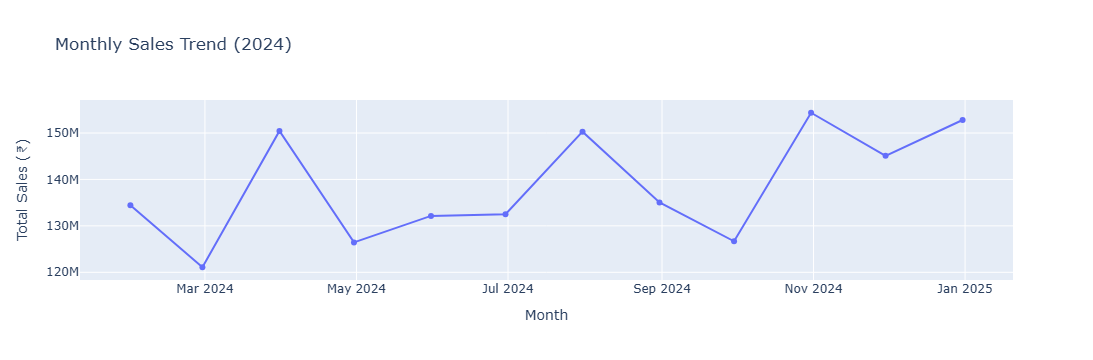

In [11]:
import plotly.express as px

fig = px.line(
    monthly_sales,
    x='Month',
    y='TotalSales',
    markers=True,
    title='Monthly Sales Trend (2024)'
)
fig.update_layout(xaxis_title='Month', yaxis_title='Total Sales (₹)')
fig.show()


In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales['TotalSales'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
forecast


C:\Users\hemen\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\hemen\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\hemen\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.



2025-01-31    1.497938e+08
2025-02-28    1.519862e+08
2025-03-31    1.503843e+08
2025-04-30    1.515547e+08
2025-05-31    1.506996e+08
2025-06-30    1.513244e+08
Freq: ME, Name: predicted_mean, dtype: float64

In [19]:
forecast_df = pd.DataFrame({
    'Month': pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(),
                           periods=6, freq='MS'),
    'ForecastedSales': forecast
})

combined = pd.concat([
    monthly_sales.reset_index(),
    forecast_df.rename(columns={'ForecastedSales': 'TotalSales'})
])


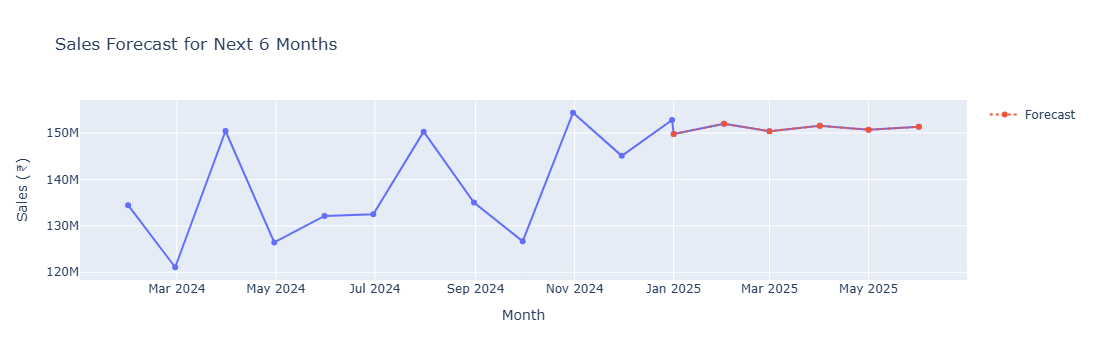

In [20]:
fig = px.line(
    combined,
    x='Month',
    y='TotalSales',
    title='Sales Forecast for Next 6 Months',
    markers=True
)
fig.add_scatter(x=forecast_df['Month'], y=forecast_df['ForecastedSales'],
                mode='lines+markers', name='Forecast', line=dict(dash='dot'))
fig.update_layout(xaxis_title='Month', yaxis_title='Sales (₹)')
fig.show()


Sales are projected to continue growing moderately through early 2025,
with expected peaks following historical Q4 trends.
The model suggests sustained post-festive stability, with mild seasonal variation